In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

# Set styles for plots
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Define data directory path
data_dir = "../data/cleaned"

In [5]:
# Load datasets
def load_data():
    physician_data = pd.read_csv(os.path.join(data_dir, "cleaned_physician_data.csv"))
    sales_prescription_data = pd.read_csv(os.path.join(data_dir, "cleaned_sales_prescription_data.csv"))
    marketing_campaign_data = pd.read_csv(os.path.join(data_dir, "cleaned_marketing_campaign_data.csv"))
    inventory_data = pd.read_csv(os.path.join(data_dir, "cleaned_inventory_data.csv"))
    historical_sales_forecast_data = pd.read_csv(os.path.join(data_dir, "cleaned_historical_sales_forecast_data.csv"))
    return physician_data, sales_prescription_data, marketing_campaign_data, inventory_data, historical_sales_forecast_data

# Load all datasets
physician_data, sales_prescription_data, marketing_campaign_data, inventory_data, historical_sales_forecast_data = load_data()


In [6]:
# 1. Physician Data EDA
print("Physician Data Overview:")
display(physician_data.info())
display(physician_data.describe(include='all'))


Physician Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Physician_ID            2000 non-null   object 
 1   Specialty               2000 non-null   object 
 2   Years_of_Experience     2000 non-null   float64
 3   Region                  2000 non-null   object 
 4   Previous_Prescriptions  2000 non-null   float64
 5   Engagement_Score        2000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 93.9+ KB


None

,Physician_ID,Specialty,Years_of_Experience,Region,Previous_Prescriptions,Engagement_Score
count,2000,2000,2000.000000,2000,2000.00000,2000.000000
unique,1000,3,NaN,4,NaN,NaN
top,P0001,General Practice,NaN,West,NaN,NaN
freq,2,1180,NaN,536,NaN,NaN
mean,NaN,NaN,15.826000,NaN,50.06600,60.837000
std,NaN,NaN,7.792309,NaN,6.88559,21.769345
min,NaN,NaN,0.000000,NaN,31.00000,20.000000
25%,NaN,NaN,11.000000,NaN,46.00000,43.000000
50%,NaN,NaN,16.000000,NaN,50.00000,60.500000
75%,NaN,NaN,20.000000,NaN,54.00000,79.000000


In [7]:

# Check for missing values
print("\nMissing Values in Physician Data:")
print(physician_data.isnull().sum())



Missing Values in Physician Data:
Physician_ID              0
Specialty                 0
Years_of_Experience       0
Region                    0
Previous_Prescriptions    0
Engagement_Score          0
dtype: int64


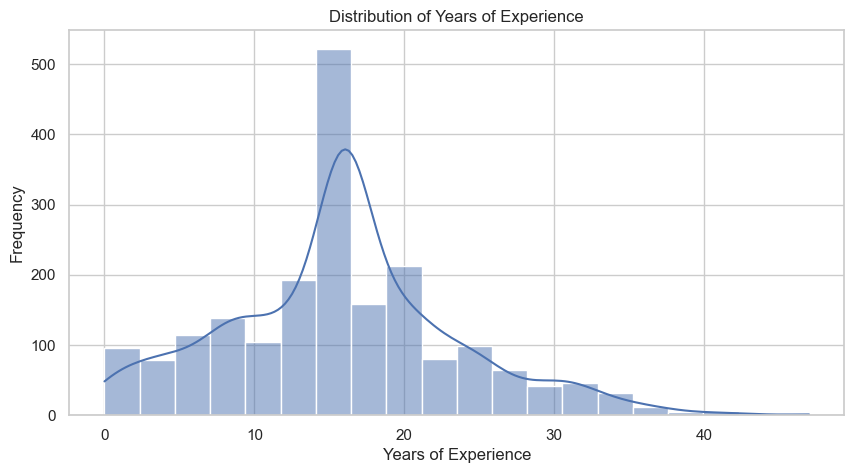

In [8]:

# Plot distribution of years of experience
plt.figure(figsize=(10, 5))
sns.histplot(physician_data['Years_of_Experience'], kde=True, bins=20)
plt.title("Distribution of Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.show()


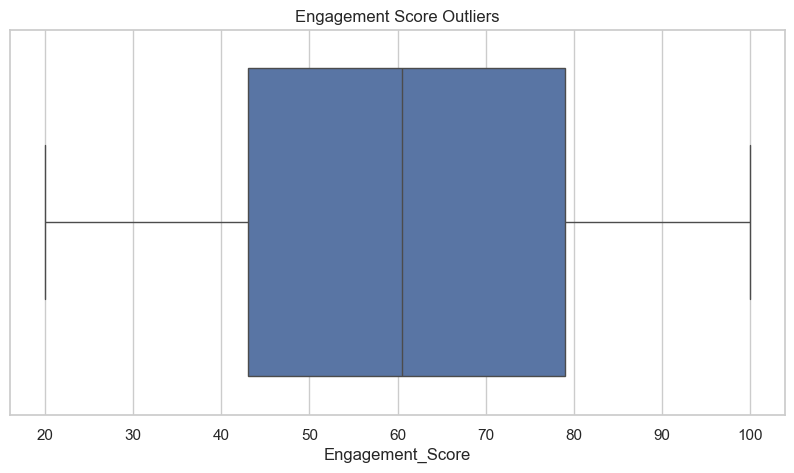

In [10]:

# Check for outliers in Engagement Score
plt.figure(figsize=(10, 5))
sns.boxplot(x=physician_data['Engagement_Score'])
plt.title("Engagement Score Outliers")
plt.show()


In [11]:

# 2. Sales and Prescription Data EDA
print("Sales and Prescription Data Overview:")
display(sales_prescription_data.info())
display(sales_prescription_data.describe(include='all'))


Sales and Prescription Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1900 non-null   object 
 1   Physician_ID     1900 non-null   object 
 2   Drug_Prescribed  1900 non-null   object 
 3   Units_Sold       1900 non-null   float64
 4   Prescription     1900 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 74.3+ KB


None

,Date,Physician_ID,Drug_Prescribed,Units_Sold,Prescription
count,1900,1900,1900,1900.000000,1900.000000
unique,623,611,1,NaN,NaN
top,2024-07-28,P0409,NewDrug,NaN,NaN
freq,12,10,1900,NaN,NaN
mean,NaN,NaN,NaN,4.912632,0.512632
std,NaN,NaN,NaN,2.046780,0.499972
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,4.000000,0.000000
50%,NaN,NaN,NaN,5.000000,1.000000
75%,NaN,NaN,NaN,6.000000,1.000000


In [12]:

# Missing values check
print("\nMissing Values in Sales and Prescription Data:")
print(sales_prescription_data.isnull().sum())



Missing Values in Sales and Prescription Data:
Date               0
Physician_ID       0
Drug_Prescribed    0
Units_Sold         0
Prescription       0
dtype: int64


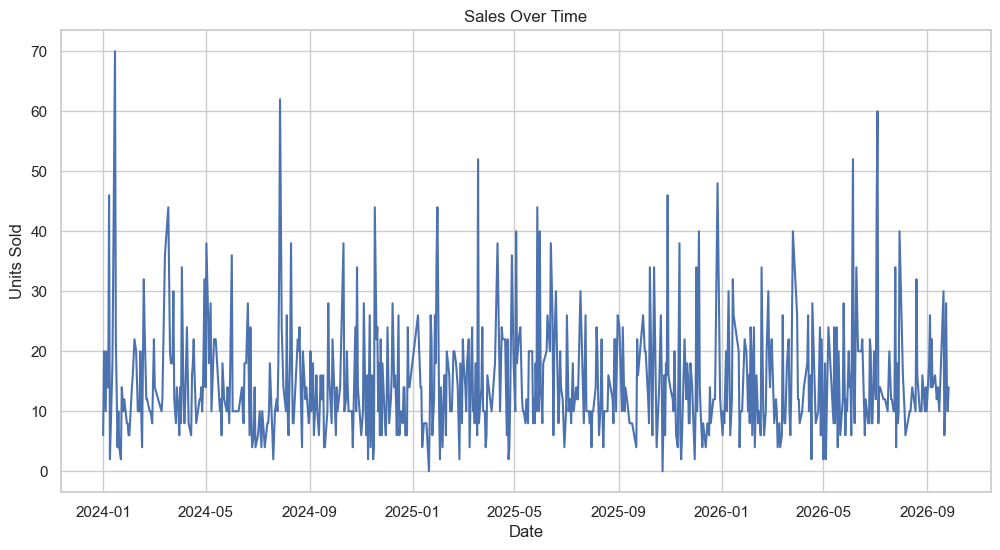

In [13]:

# Sales trend over time
sales_prescription_data['Date'] = pd.to_datetime(sales_prescription_data['Date'])
sales_over_time = sales_prescription_data.groupby('Date')['Units_Sold'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Units_Sold')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


In [14]:

# 3. Marketing Campaign Data EDA
print("Marketing Campaign Data Overview:")
display(marketing_campaign_data.info())
display(marketing_campaign_data.describe(include='all'))

Marketing Campaign Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign_ID          2000 non-null   object 
 1   Physician_ID         2000 non-null   object 
 2   Campaign_Type        2000 non-null   object 
 3   Contact_Frequency    2000 non-null   float64
 4   Last_Contact_Date    2000 non-null   object 
 5   Engagement_Response  2000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 93.9+ KB


None

,Campaign_ID,Physician_ID,Campaign_Type,Contact_Frequency,Last_Contact_Date,Engagement_Response
count,2000,2000,2000,2000.000000,2000,2000
unique,1000,624,3,NaN,640,3
top,C0001,P0299,Email,NaN,2024-07-08,High
freq,2,10,828,NaN,12,808
mean,NaN,NaN,NaN,2.965000,NaN,NaN
std,NaN,NaN,NaN,1.573853,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN


In [15]:

# Check for missing values
print("\nMissing Values in Marketing Campaign Data:")
print(marketing_campaign_data.isnull().sum())



Missing Values in Marketing Campaign Data:
Campaign_ID            0
Physician_ID           0
Campaign_Type          0
Contact_Frequency      0
Last_Contact_Date      0
Engagement_Response    0
dtype: int64


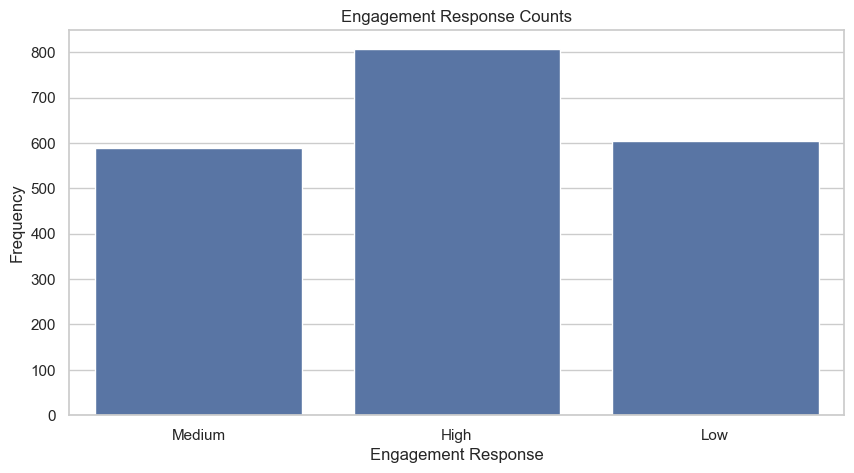

In [16]:

# Engagement response analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Engagement_Response', data=marketing_campaign_data)
plt.title("Engagement Response Counts")
plt.xlabel("Engagement Response")
plt.ylabel("Frequency")
plt.show()


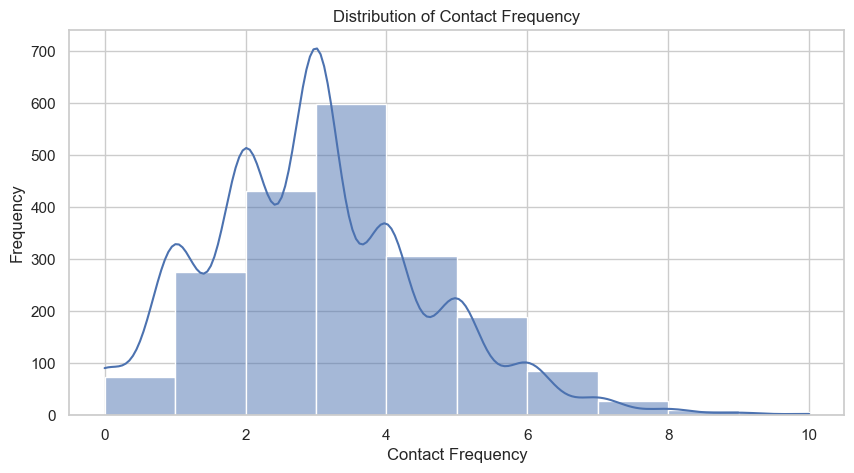

In [17]:

# Contact Frequency distribution
plt.figure(figsize=(10, 5))
sns.histplot(marketing_campaign_data['Contact_Frequency'].dropna(), kde=True, bins=10)
plt.title("Distribution of Contact Frequency")
plt.xlabel("Contact Frequency")
plt.ylabel("Frequency")
plt.show()


In [18]:

# 4. Inventory Data EDA
print("Inventory Data Overview:")
display(inventory_data.info())
display(inventory_data.describe(include='all'))


Inventory Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2000 non-null   object 
 1   Distribution_Center  2000 non-null   object 
 2   Region               2000 non-null   object 
 3   Inventory_Level      2000 non-null   float64
 4   Stockout             2000 non-null   object 
 5   Reorder_Quantity     2000 non-null   float64
 6   Lead_Time_Days       2000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


None

,Date,Distribution_Center,Region,Inventory_Level,Stockout,Reorder_Quantity,Lead_Time_Days
count,2000,2000,2000,2000.000000,2000,2000.000000,2000.000000
unique,639,5,4,NaN,2,NaN,NaN
top,2026-09-13,DC004,Midwest,NaN,Yes,NaN,NaN
freq,10,410,534,NaN,1000,NaN,NaN
mean,NaN,NaN,NaN,453.356000,NaN,252.990000,9.587000
std,NaN,NaN,NaN,826.928443,NaN,137.782266,2.762652
min,NaN,NaN,NaN,0.000000,NaN,0.000000,5.000000
25%,NaN,NaN,NaN,174.750000,NaN,144.750000,7.000000
50%,NaN,NaN,NaN,370.500000,NaN,258.500000,10.000000
75%,NaN,NaN,NaN,554.000000,NaN,370.250000,12.000000


In [19]:

# Check for missing values
print("\nMissing Values in Inventory Data:")
print(inventory_data.isnull().sum())



Missing Values in Inventory Data:
Date                   0
Distribution_Center    0
Region                 0
Inventory_Level        0
Stockout               0
Reorder_Quantity       0
Lead_Time_Days         0
dtype: int64


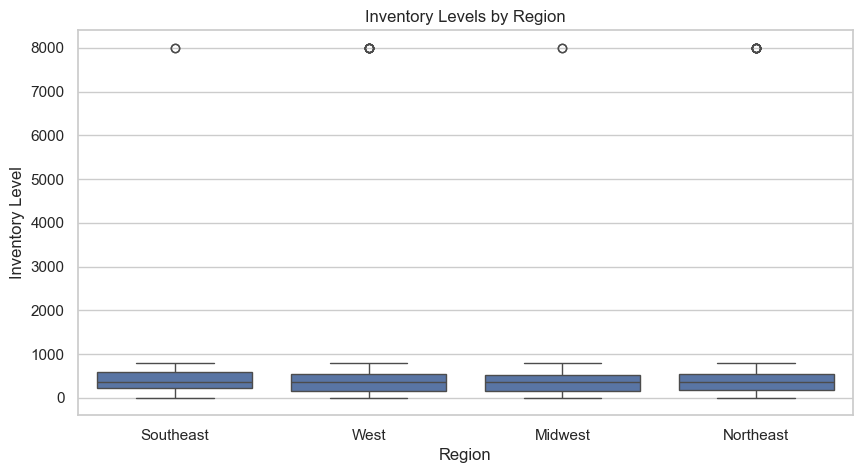

In [20]:

# Inventory Level by Region
plt.figure(figsize=(10, 5))
sns.boxplot(x="Region", y="Inventory_Level", data=inventory_data)
plt.title("Inventory Levels by Region")
plt.xlabel("Region")
plt.ylabel("Inventory Level")
plt.show()


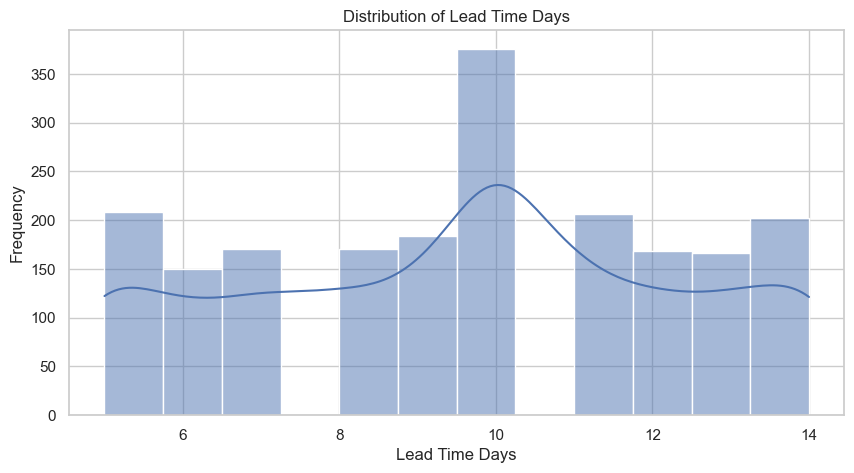

In [21]:

# Lead Time Days distribution
plt.figure(figsize=(10, 5))
sns.histplot(inventory_data['Lead_Time_Days'].dropna(), kde=True)
plt.title("Distribution of Lead Time Days")
plt.xlabel("Lead Time Days")
plt.ylabel("Frequency")
plt.show()


In [22]:

# 5. Historical Sales and Forecast Data EDA
print("Historical Sales and Forecast Data Overview:")
display(historical_sales_forecast_data.info())
display(historical_sales_forecast_data.describe(include='all'))


Historical Sales and Forecast Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2000 non-null   object 
 1   Region             2000 non-null   object 
 2   Units_Sold         2000 non-null   float64
 3   Forecasted_Demand  2000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 62.6+ KB


None

,Date,Region,Units_Sold,Forecasted_Demand
count,2000,2000,2000.000000,2000.000000
unique,641,4,NaN,NaN
top,2028-11-26,Southeast,NaN,NaN
freq,14,530,NaN,NaN
mean,NaN,NaN,440.347000,420.415000
std,NaN,NaN,350.741572,20.228331
min,NaN,NaN,0.000000,360.000000
25%,NaN,NaN,387.000000,407.000000
50%,NaN,NaN,400.000000,420.000000
75%,NaN,NaN,412.000000,434.000000


In [23]:

# Check for missing values
print("\nMissing Values in Historical Sales and Forecast Data:")
print(historical_sales_forecast_data.isnull().sum())



Missing Values in Historical Sales and Forecast Data:
Date                 0
Region               0
Units_Sold           0
Forecasted_Demand    0
dtype: int64


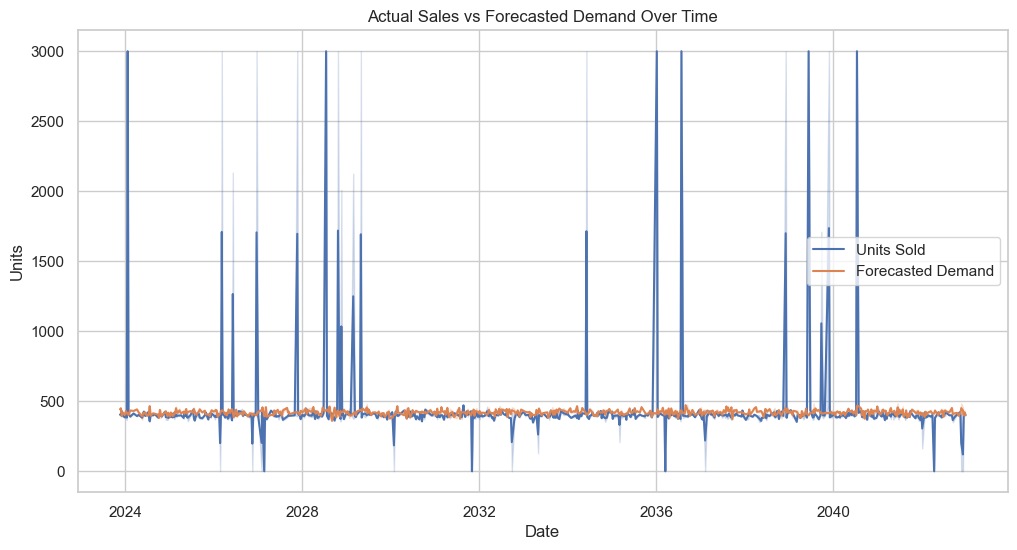

In [24]:

# Sales and forecast trend over time
historical_sales_forecast_data['Date'] = pd.to_datetime(historical_sales_forecast_data['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical_sales_forecast_data, x='Date', y='Units_Sold', label="Units Sold")
sns.lineplot(data=historical_sales_forecast_data, x='Date', y='Forecasted_Demand', label="Forecasted Demand")
plt.title("Actual Sales vs Forecasted Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Units")
plt.legend()
plt.show()


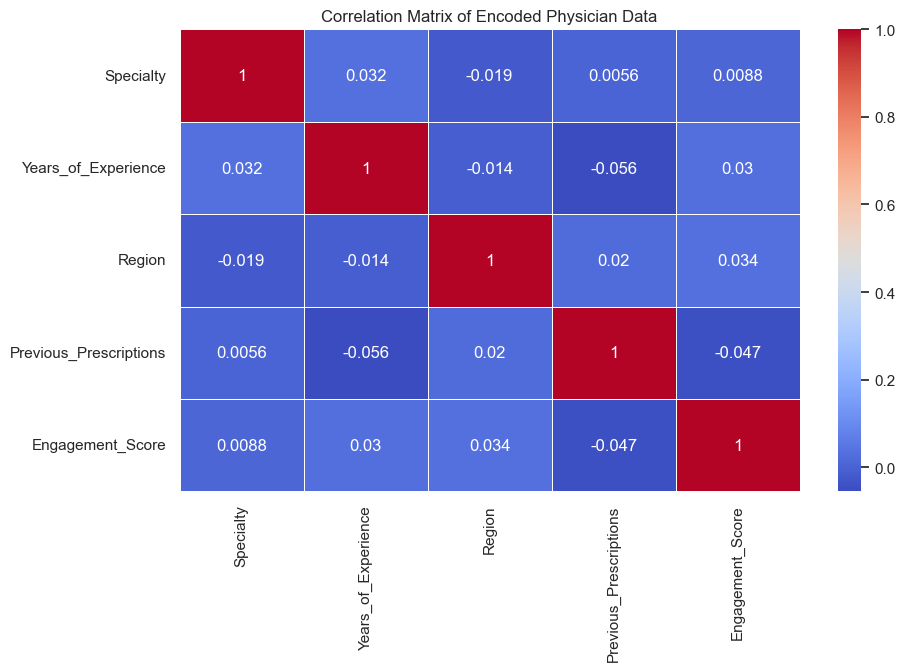

In [28]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying the original dataset
physician_data_encoded = physician_data.copy()

# Drop 'Physician_ID' as it's a unique identifier and not useful for correlation
physician_data_encoded.drop(columns=['Physician_ID'], inplace=True)

# Encode categorical columns 'Specialty' and 'Region'
label_encoder = LabelEncoder()
physician_data_encoded['Specialty'] = label_encoder.fit_transform(physician_data_encoded['Specialty'].astype(str))
physician_data_encoded['Region'] = label_encoder.fit_transform(physician_data_encoded['Region'].astype(str))

# Perform correlation analysis on the encoded data
correlation_matrix = physician_data_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Encoded Physician Data")
plt.show()

In [29]:
# One-hot encode categorical columns
physician_data_encoded = pd.get_dummies(physician_data_encoded, columns=['Specialty', 'Region'])

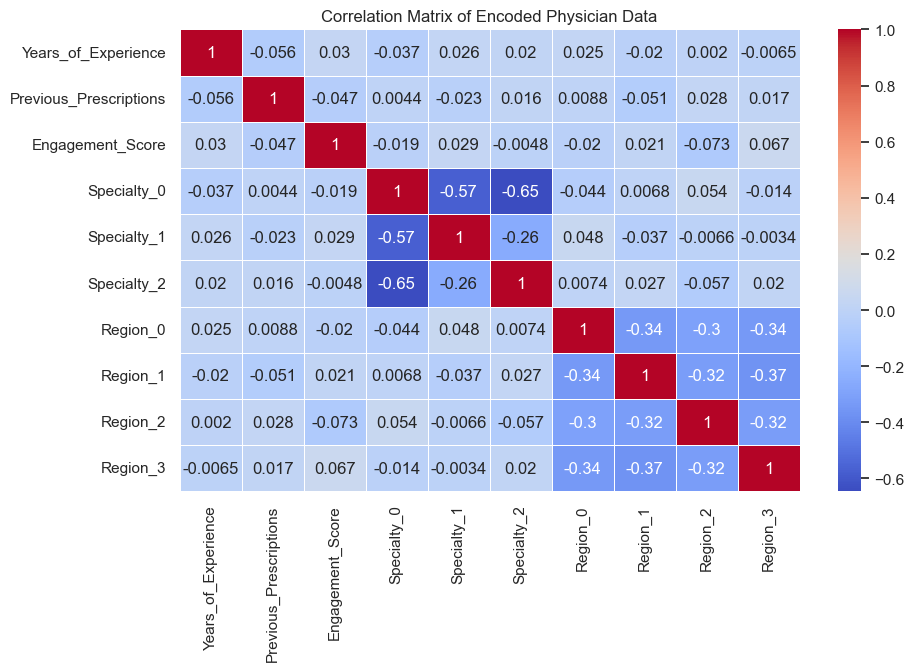

In [30]:
# Perform correlation analysis on the encoded data
correlation_matrix = physician_data_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Encoded Physician Data")
plt.show()